In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movie_df=pd.read_csv(r"C:\Users\Acer.DESKTOP-TSARLU6\Downloads\movies.csv")
credits_df=pd.read_csv(r"C:\Users\Acer.DESKTOP-TSARLU6\Downloads\credits.csv")

In [14]:
credit_df_cleaned = credits_df.rename(index=str,columns={'movie_id':'id'})

In [31]:
movie=credit_df_cleaned.merge(movie_df,on='id')

In [32]:
movie

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,...,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-1992,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,[],en,Newlyweds,...,[],26-12-2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",0

In [19]:
movie.columns

Index(['id', 'title_x', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title_y', 'vote_average', 'vote_count'],
      dtype='object')

In [33]:
movie.drop(columns=['title_x','title_y','budget','homepage','status','production_countries','release_date'],inplace=True)

In [35]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   cast                  4803 non-null   object 
 2   crew                  4803 non-null   object 
 3   genres                4803 non-null   object 
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

# Apply Weighted Average 

In [39]:
V= movie['vote_count']
R= movie['vote_average']
C=movie['vote_average'].mean()
M=movie['vote_count'].quantile(0.7)


In [40]:
movie['weighted_average']=((R*V)+(C*M))/(V+M)

In [44]:
movie1=movie[['id','original_title','popularity','vote_average','vote_count','weighted_average']]

In [76]:
top_n=movie1.sort_values(by='weighted_average', ascending=False)

In [77]:
top_m=movie1.sort_values(by='popularity', ascending=False)

In [62]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


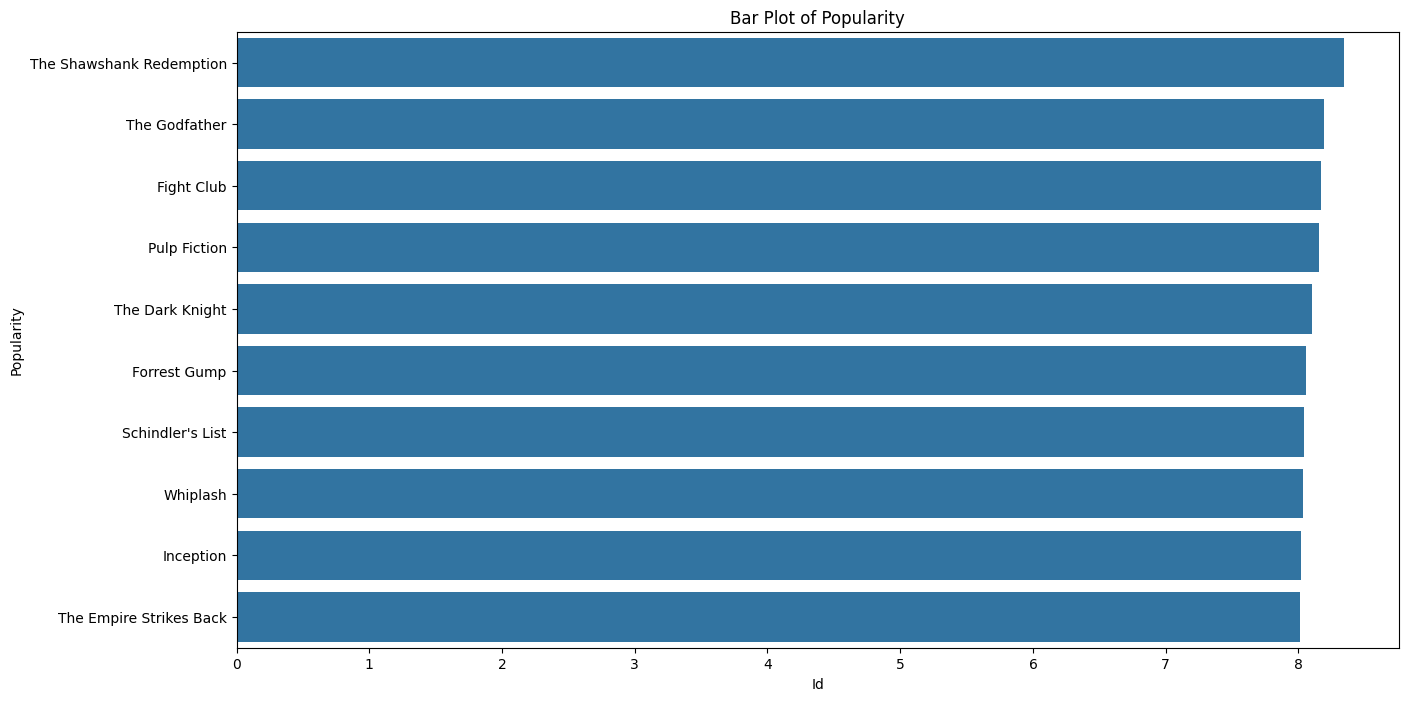

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))  # Optional: Set the figure size
sns.barplot(x=top_n['weighted_average'].head(10),y=top_n['original_title'].head(10))
plt.xlabel('Id')
plt.ylabel('Popularity')
plt.title('Bar Plot of Popularity')
plt.show()



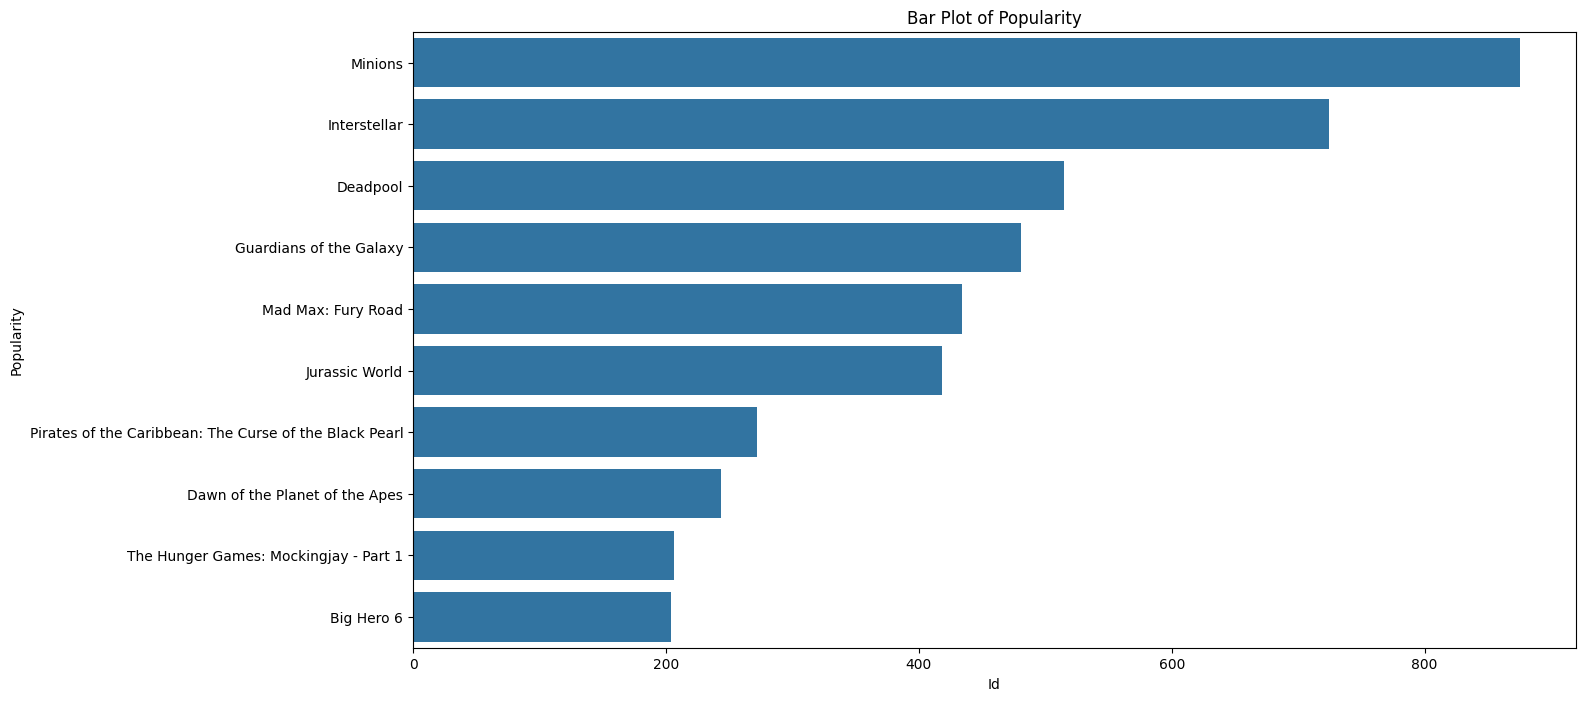

In [79]:
plt.figure(figsize=(15, 8))  # Optional: Set the figure size
sns.barplot(x=top_m['popularity'].head(10),y=top_m['original_title'].head(10))
plt.xlabel('Id')
plt.ylabel('Popularity')
plt.title('Bar Plot of Popularity')
plt.show()

In [87]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
scaled_df=ms.fit_transform(movie[['popularity','weighted_average']])
normalized_df = pd.DataFrame(scaled_df,columns=['n_popularity','n_weighted_average'])

In [89]:
movie[['n_popularity','n_weighted_average']]=normalized_df

In [93]:
movie['score'] = movie['n_popularity']*0.5 + movie['n_weighted_average']*0.5

In [96]:
movie_sort = movie[['id','original_title','popularity','weighted_average','score']]

In [100]:
movie_sort=movie.sort_values(by='score',ascending=False)

In [101]:
movie_sort= movie_sort[['id','original_title','popularity','weighted_average','score']]

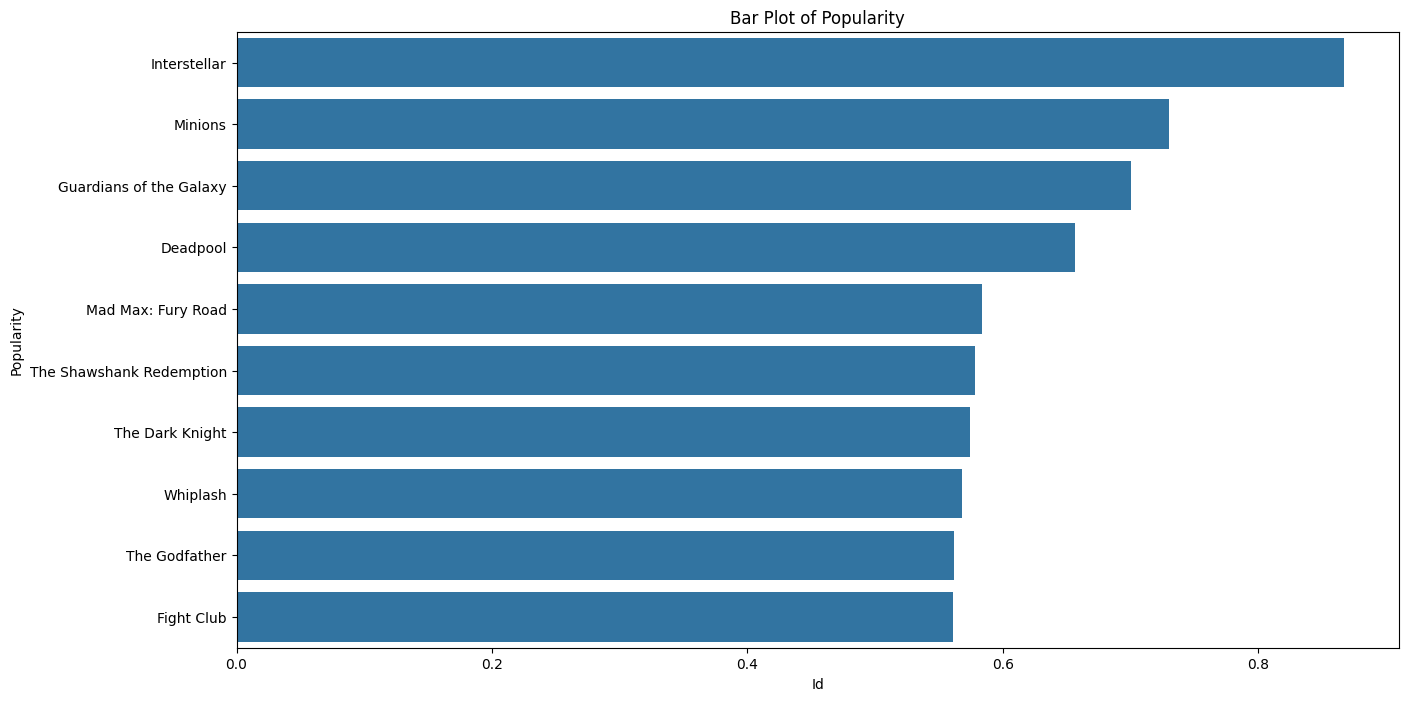

In [103]:
plt.figure(figsize=(15, 8))  # Optional: Set the figure size
sns.barplot(x=movie_sort['score'].head(10),y=movie_sort['original_title'].head(10))
plt.xlabel('Id')
plt.ylabel('Popularity')
plt.title('Bar Plot of Popularity')
plt.show()